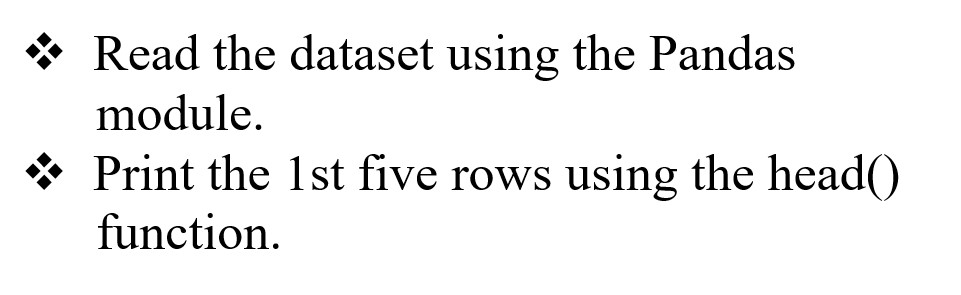

In [ ]:

import pandas as pd
import numpy as np
df = pd.read_csv('/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
df.head()

<ipython-input-4-0ddb47823d29>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


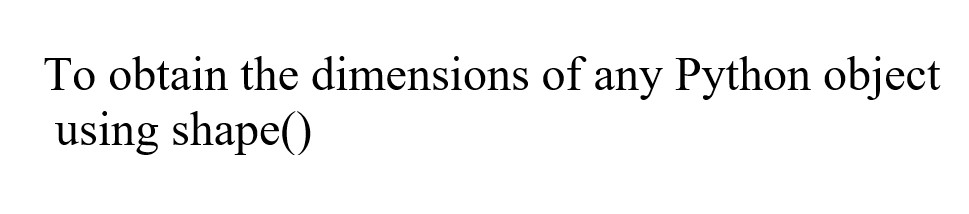

In [ ]:
df.shape

(181691, 135)

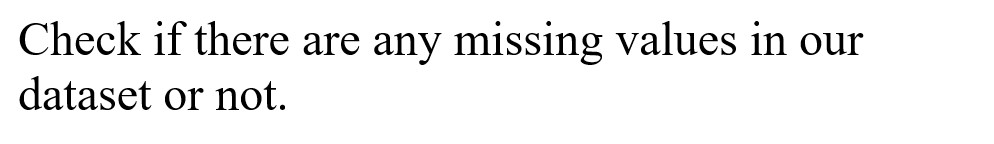

In [ ]:
print(df.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


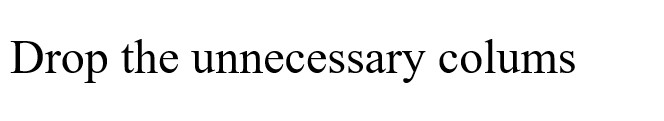

In [ ]:
df.drop(df.columns[[4,134]], axis=1, inplace=True)
df.head()

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1


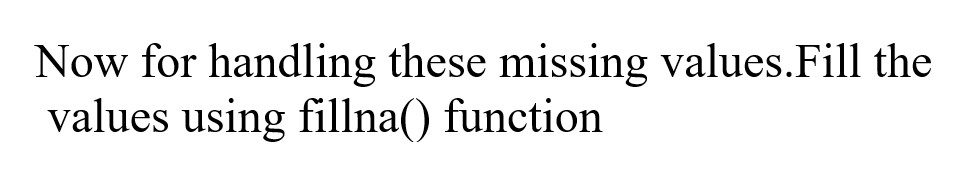

In [ ]:
df["resolution"].fillna("No Resolution", inplace = True) 
df["addnotes"].fillna("No addnotes", inplace = True) 
df["nreleased"].fillna("Not Known", inplace = True)  
df["scite1"].fillna("No scitation", inplace = True)  
df["scite2"].fillna("No scitation", inplace = True)  
df["scite3"].fillna("No scitation", inplace = True)  
df.head()

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,No Resolution,58,Dominican Republic,2,Central America & Caribbean,...,Not Known,No addnotes,No scitation,No scitation,No scitation,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,No Resolution,130,Mexico,1,North America,...,Not Known,No addnotes,No scitation,No scitation,No scitation,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,No Resolution,160,Philippines,5,Southeast Asia,...,Not Known,No addnotes,No scitation,No scitation,No scitation,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,No Resolution,78,Greece,8,Western Europe,...,Not Known,No addnotes,No scitation,No scitation,No scitation,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,No Resolution,101,Japan,4,East Asia,...,Not Known,No addnotes,No scitation,No scitation,No scitation,PGIS,-9,-9,1,1


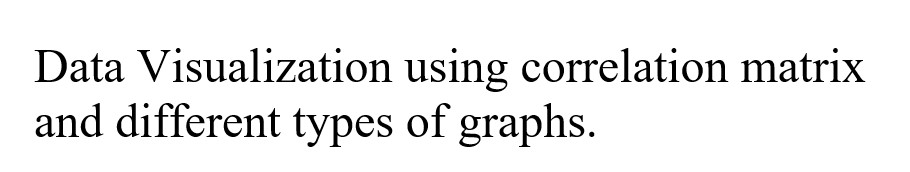

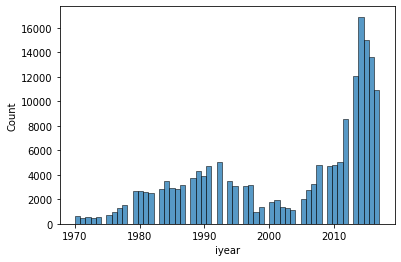

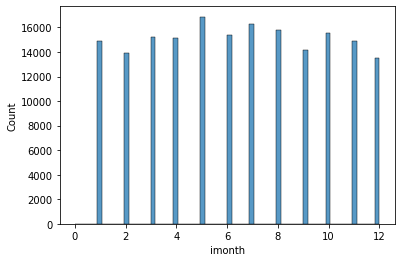

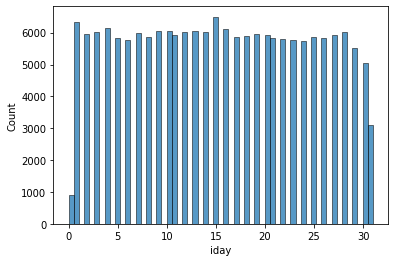

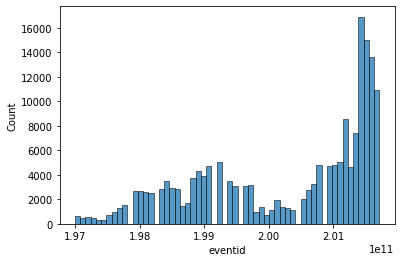

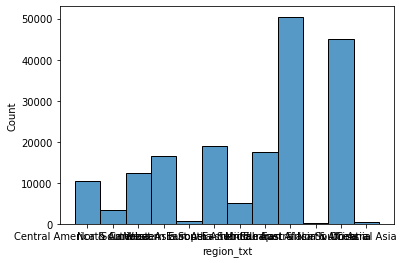

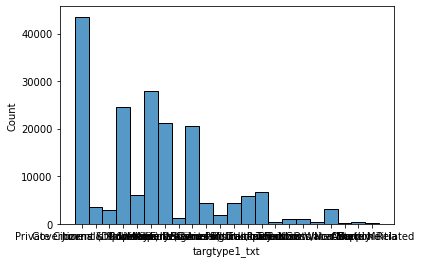

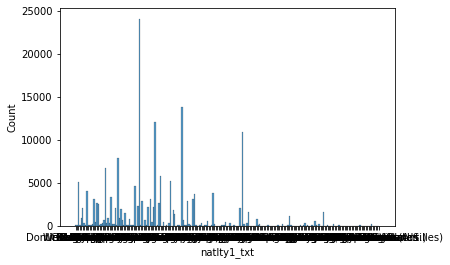

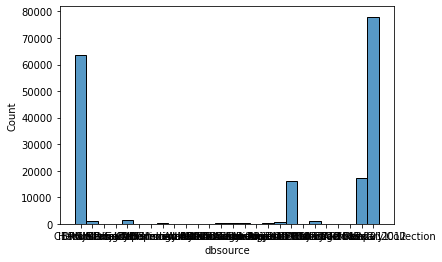

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
arr=['iyear','imonth','iday','eventid','region_txt','targtype1_txt','natlty1_txt','dbsource']
for i in range(0,len(arr)):
  sns.histplot(x=arr[i], data=df)
  plt.show()

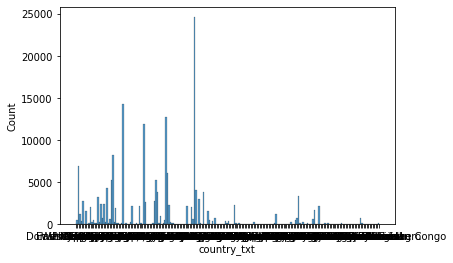

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.histplot(x='country_txt', data=df, )
plt.show()

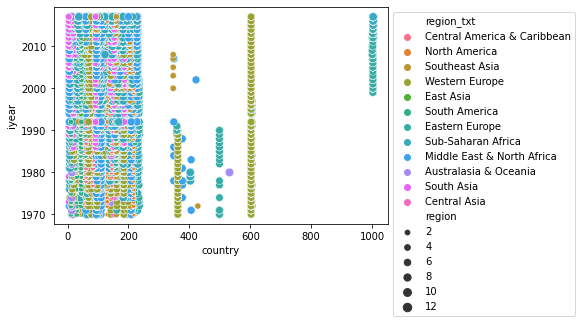

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot( x="country", y='iyear', data=df,
                hue='region_txt', size='region')
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [ ]:
#Correlation Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

<Axes: >

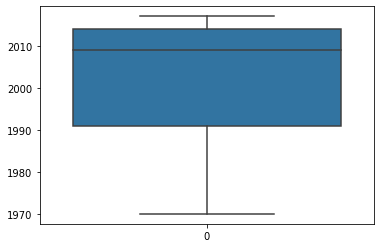

In [ ]:
# Box Plot
import seaborn as sns
arr=['iyear','imonth','iday']
sns.boxplot(df[arr[0]])


<Axes: >

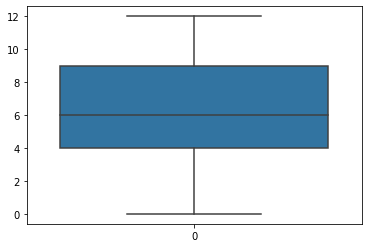

In [ ]:
sns.boxplot(df[arr[1]])


<Axes: >

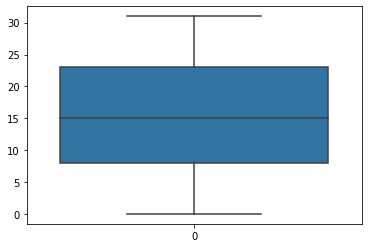

In [ ]:

sns.boxplot(df[arr[2]])

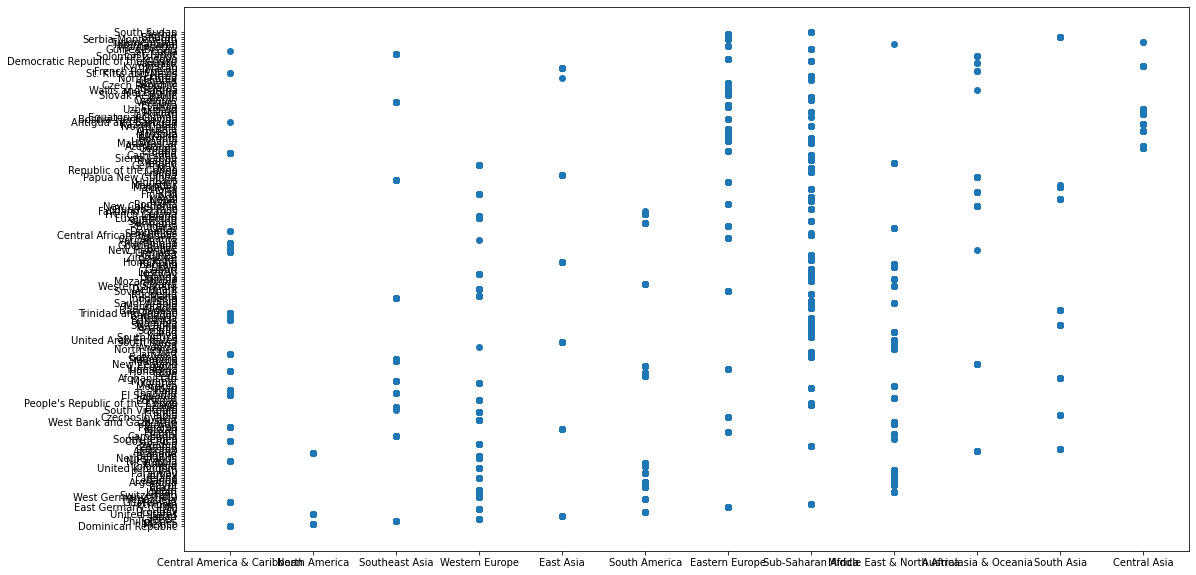

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['region_txt'],df['country_txt'])

plt.show()
